# Dados obtidos no site da ONS (Operador Nacional do Sistema):

https://dados.ons.org.br/dataset/ena-diario-por-bacia


<img src="img/dicionario-dados-ons.png">

In [11]:
%%time

import os
import requests

download_base_url = 'https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/ena_bacia_di/ENA_DIARIO_BACIAS_{}.csv'
download_dir = '/usr/src/code/data/01_raw/ena-diario-por-bacia'

from_year = 2000
to_year = 2021

if not os.path.exists(download_dir):
    os.makedirs(download_dir)

for year in range(from_year,to_year+1):
    url = download_base_url.format(year)
    filename = 'ENA_DIARIO_BACIAS_{}.csv'.format(year)
    
    with requests.get(url, allow_redirects=True) as r:
        with open(os.path.join(download_dir, filename), 'wb') as file:
            file.write(r.content)

CPU times: user 683 ms, sys: 87.9 ms, total: 771 ms
Wall time: 45.5 s


Cadastre o dataset no arquivo de catálogo (conf/base/catalog.yml) com a seguinte *string*:

<pre><code>
ena-diario-por-bacia:
  layer: raw
  type: PartitionedDataSet
  path: data/01_raw/ena-diario-por-bacia  # path to the location of partitions
  dataset:
    type: pandas.CSVDataSet  # shorthand notation for the dataset which will handle individual partitions
    save_args:
      index: False
    load_args:
      sep: ';'
      parse_dates: ['ena_data']
</code></pre>


Após realizar o cadastro e reiniciar o kernel do Jupyter (hotkey: ESC + '00'), os dados podem ser carregados da seguinte maneira:

In [7]:
import pandas as pd

ena_data = catalog.load("ena-diario-por-bacia")
data_li = []

for key in ena_data.keys():
    data_li.append(ena_data[key]())
    
ena = pd.concat(data_li)
ena.head()

2021-12-08 12:14:49,816 - kedro.io.data_catalog - INFO - Loading data from `ena-diario-por-bacia` (PartitionedDataSet)...


,nom_bacia,ena_data,ena_bruta_bacia_mwmed,ena_bruta_bacia_percentualmlt,ena_armazenavel_bacia_mwmed,ena_armazenavel_bacia_percentualmlt
0,AMAZONAS,2000-01-01,33.269001,143.072998,22.260000,95.728897
1,ARAGUARI,2000-01-01,0.000000,0.000000,0.000000,0.000000
2,CAPIVARI,2000-01-01,134.440994,82.368797,134.440994,82.368797
3,DOCE,2000-01-01,512.484985,58.402302,456.674988,52.042198
4,GRANDE,2000-01-01,3628.160889,40.560902,3602.197998,40.270699


# Filtrar dados da bacia do Rio Paraná

In [15]:
filtered_data = ena[ena['nom_bacia'] == 'PARANA']
filtered_data.set_index('ena_data', inplace=True)

# Plotando os dados

<AxesSubplot:xlabel='ena_data'>

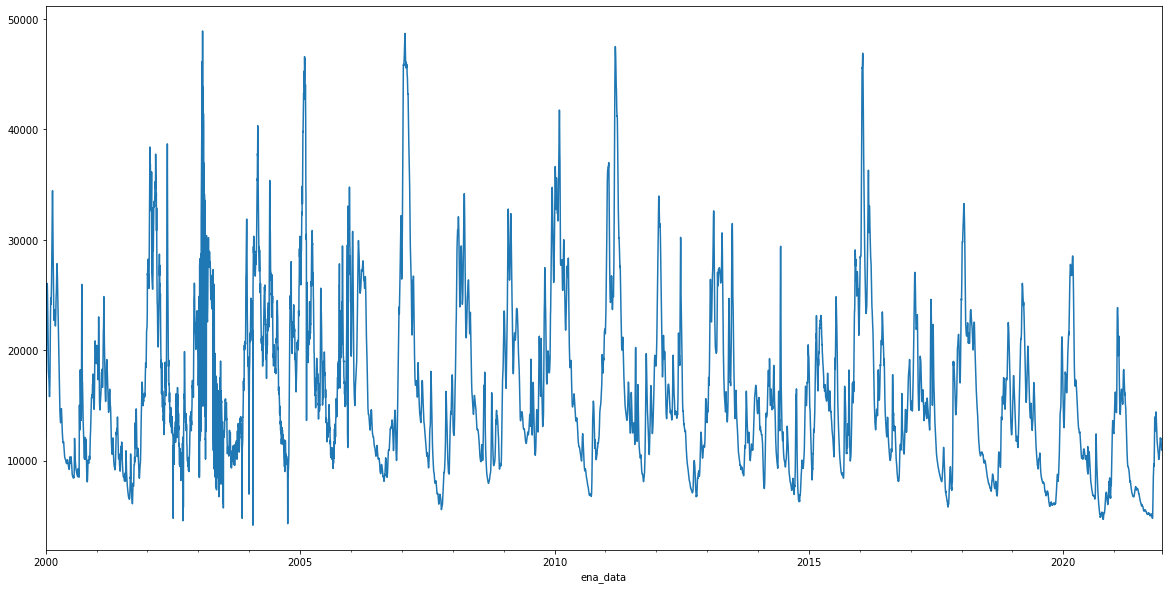

In [18]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20, 10)
filtered_data['ena_bruta_bacia_mwmed'].plot()

<AxesSubplot:xlabel='ena_data'>

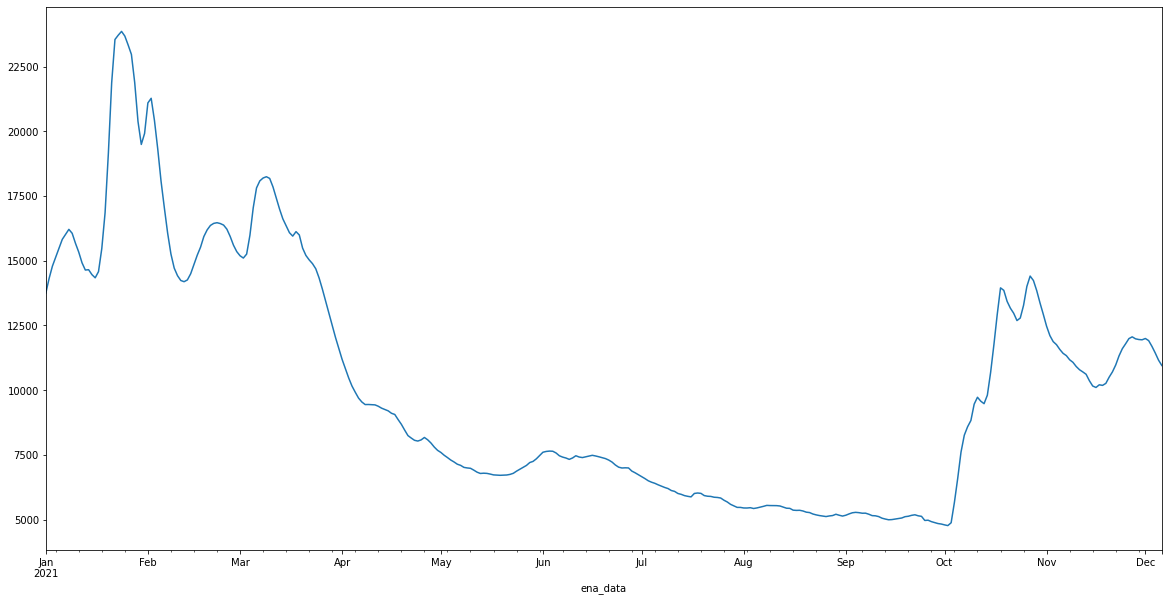

In [22]:
filtered_data[filtered_data.index.year == 2021]['ena_bruta_bacia_mwmed'].plot()

# Salvar os dados que serão utilizados para treino

In [23]:
filtered_data.to_csv('/usr/src/code/data/02_intermediate/ena-diario-parana.csv', index=True)